# <font color='DarkBlue'> <center> Face Mask Detection

**Problem Statement:**


Develop a Face Mask Detection System using Computer Vision and Convolutional Neural Networks (CNNs) to ensure public safety during the ongoing COVID-19 pandemic. The system should be able to accurately detect whether a person in an image or video is wearing a face mask or not. This technology is crucial for maintaining safety protocols in public spaces, such as airports, hospitals, schools, and public transportation, where wearing masks is mandatory.

**The project aims to address the following key challenges:**

1. Face Detection: Implement robust face detection algorithms to locate faces within an image or video frame, even under varying lighting conditions, angles, and occlusions.
2. Mask Classification: Develop a CNN-based classification model to accurately identify whether a detected face is wearing a mask or not. The model should handle different mask types (e.g., surgical masks, cloth masks) and account for variations in mask positioning (e.g., properly worn, partially worn, or not worn).
3. Real-time Processing: Ensure efficient real-time processing of video streams to detect faces and classify mask usage in real-world scenarios. This involves optimizing algorithms for speed and accuracy, considering hardware constraints for deployment on different platforms.
4. Accuracy and Reliability: Strive for high accuracy and reliability in mask detection to minimize false positives and false negatives. The system should perform well across diverse demographics, including different ages, genders, and ethnicities.




**Objective of the project**
The objective of developing a Face Mask Detection System is to leverage computer vision technology, specifically Convolutional Neural Networks (CNNs), to create an automated solution that accurately identifies individuals wearing masks in public spaces. This project is motivated by the following goals and considerations:

1. Public Health Impact: Create a tool that aligns with global health recommendations, emphasizing the importance of wearing masks to prevent the spread of contagious diseases, such as COVID-19 and future pandemics.

2. Automated Monitoring: Develop a system capable of automatically monitoring public spaces, such as airports, train stations, shopping malls, and healthcare facilities, to ensure compliance with mask-wearing guidelines.

3. Efficient Resource Allocation: Enable efficient allocation of resources, such as personnel and enforcement measures, by automating the process of identifying individuals not wearing masks or wearing them incorrectly.

4. Data-driven Insights: Generate valuable insights and analytics based on mask-wearing behavior trends over time, providing actionable data for public health authorities and policymakers.

5. Scalability and Adaptability: Design the system to scale seamlessly across various deployment scenarios, from small-scale installations to large-scale city-wide implementations, and adapt to evolving mask-wearing protocols and regulations.
6. Privacy and Ethical Considerations: Ensure that the system upholds privacy standards and ethical considerations, such as anonymizing data, obtaining consent where necessary, and protecting individual rights.

7. Integration with IoT and Smart City Solutions: Explore integration opportunities with Internet of Things (IoT) devices and smart city infrastructure to enhance overall situational awareness and public safety measures.

8. Education and Awareness: Use the system as an educational tool to raise awareness about the importance of mask-wearing and promote responsible behavior in public spaces.

By achieving these objectives, the Face Mask Detection System aims to contribute significantly to public health initiatives, mitigate the spread of infectious diseases, and foster a culture of proactive prevention and health-conscious behavior in society.

In [ ]:
# installing kaggle
!pip install kaggle

In [ ]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### Importing Face Mask Dataset from Kaggle

In [ ]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/prithwirajmitra/covid-face-mask-detection-dataset
License(s): copyright-authors
covid-face-mask-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the composed dataset
from zipfile import ZipFile
dataset = '/content/covid-face-mask-detection-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

 covid-face-mask-detection-dataset.zip	 data   kaggle.json  'New Masks Dataset'   sample_data


### Importing the required dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from sklearn.model_selection import train_test_split

### Training Data

In [ ]:
train_withmaskfiles = os.listdir('/content/New Masks Dataset/Train/Mask')
print(train_withmaskfiles[0:5])
print(train_withmaskfiles[-5:])

['0626.jpg', '1106.jpg', '1107.jpg', '1453.jpg', '1278.jpg']
['0932.jpg', '1608.jpeg', '0277.jpg', '1255.jpg', '0780.jpg']


In [ ]:
train_withoutmaskfiles = os.listdir('/content/New Masks Dataset/Train/Non Mask')
print(train_withoutmaskfiles[0:5])
print(train_withoutmaskfiles[-5:])

['46.jpg', '337.jpg', '293.jpg', '160.jpg', '326.jpg']
['163.jpg', '335.jpg', '87.jpg', '350.jpg', '132.jpg']


In [ ]:
print('Number of with Mask Images:', len(train_withmaskfiles))
print('Number of without Mask Images:', len(train_withoutmaskfiles))

Number of with Mask Images: 300
Number of without Mask Images: 300


### Test Data

In [ ]:
test_withmaskfiles = os.listdir('/content/New Masks Dataset/Test/Mask')
print(test_withmaskfiles[0:5])
print(test_withmaskfiles[-5:])

['2070.jpg', '2159.png', '2267.png', '2215.png', '2268.png']
['2265.png', '2182.png', '2205.png', '2154.png', '2188.png']


In [ ]:
test_withoutmaskfiles = os.listdir('/content/New Masks Dataset/Test/Non Mask')
print(test_withoutmaskfiles[0:5])
print(test_withoutmaskfiles[-5:])

['real_01076.jpg', 'real_01041.jpg', 'real_01033.jpg', 'real_01036.jpg', 'real_01053.jpg']
['real_01075.jpg', 'real_01067.jpg', 'real_01032.jpg', 'real_01078.jpg', 'real_01048.jpg']


In [ ]:
print('Number of with Mask Images:', len(test_withmaskfiles))
print('Number of without Mask Images:', len(test_withoutmaskfiles))

Number of with Mask Images: 50
Number of without Mask Images: 50


### **Creating labels for the two class of images**

- with mask --> 1
- without mask --> 0

In [ ]:
# create the labels

train_withmasklabels = [1]*300

train_withoutmasklabels = [0]*300

test_withmasklabels = [1]*50
test_withoutmasklabels = [0]*50

In [ ]:
# printing the data
print(train_withmasklabels[0:5])
print(train_withoutmasklabels[-5:])
print()
print(test_withmasklabels[0:5])
print(test_withoutmasklabels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(train_withmasklabels))
print(len(train_withoutmasklabels))
print()
print(len(test_withmasklabels))
print(len(test_withoutmasklabels))

300
300

50
50


In [ ]:
labels = train_withmasklabels + train_withoutmasklabels + test_withmasklabels + test_withoutmasklabels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

700
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


### Displaying the  Training images

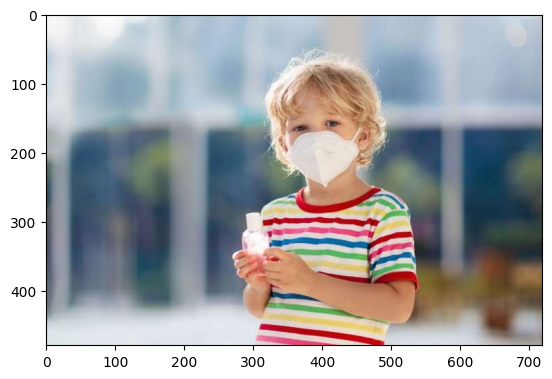

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/New Masks Dataset/Train/Mask/1255.jpg')
imgplot = plt.imshow(img)

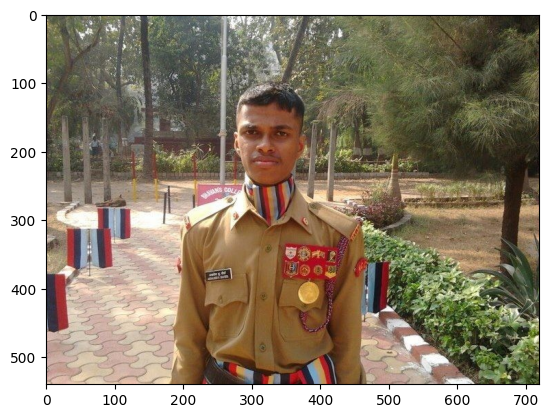

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/New Masks Dataset/Train/Non Mask/132.jpg')
imgplot = plt.imshow(img)

`Observation`:
- We have to resize the images
- convert the images into numpy arrays
- Convert the images into black and white

### Displaying the  Test images

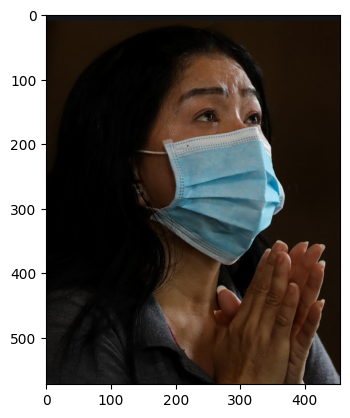

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/New Masks Dataset/Test/Mask/2215.png')
imgplot = plt.imshow(img)

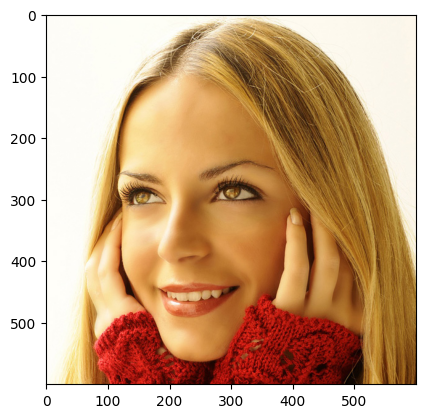

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/New Masks Dataset/Test/Non Mask/real_01036.jpg')
imgplot = plt.imshow(img)

**Observation**
- Both the with mask and without mask images are different in size
- So we have to resize them

### Image Processing

In [ ]:
# conver images into numpy arrays

train_withmaskpath = '/content/New Masks Dataset/Train/Mask/'

train_data = []

for img_file in train_withmaskfiles:
  image = Image.open(train_withmaskpath + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  train_data.append(image)


train_withoutmaskpath = '/content/New Masks Dataset/Train/Non Mask/'

for img_file in train_withoutmaskfiles:
  image = Image.open(train_withoutmaskpath + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  train_data.append(image)


test_withmaskpath = '/content/New Masks Dataset/Test/Mask/'

test_data = []

for img_file in test_withmaskfiles:
  image = Image.open(test_withmaskpath + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  test_data.append(image)


test_withoutmaskpath = '/content/New Masks Dataset/Test/Non Mask/'

for img_file in test_withoutmaskfiles:
  image = Image.open(test_withoutmaskpath + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  test_data.append(image)

In [ ]:
print(len(train_data))
print(type(train_data))
print(train_data[0])
print(train_data[0].shape)
print()
print(len(test_data))
print(type(test_data))
print(test_data[0])
print(test_data[0].shape)

600
<class 'list'>
[[[115 171 220]
  [115 171 220]
  [115 171 220]
  ...
  [115 171 220]
  [115 171 220]
  [115 171 220]]

 [[115 171 220]
  [115 171 220]
  [115 171 220]
  ...
  [115 171 220]
  [115 171 220]
  [115 171 220]]

 [[115 171 220]
  [115 171 220]
  [115 171 220]
  ...
  [115 171 220]
  [115 171 220]
  [115 171 220]]

 ...

 [[115 171 220]
  [115 171 220]
  [115 171 220]
  ...
  [115 171 220]
  [115 171 220]
  [115 171 220]]

 [[115 171 220]
  [115 171 220]
  [115 171 220]
  ...
  [115 171 220]
  [115 171 220]
  [115 171 220]]

 [[115 171 220]
  [115 171 220]
  [115 171 220]
  ...
  [115 171 220]
  [115 171 220]
  [115 171 220]]]
(128, 128, 3)

100
<class 'list'>
[[[ 58  61  42]
  [ 58  61  42]
  [ 58  63  44]
  ...
  [ 53  61  50]
  [ 54  63  52]
  [ 55  65  54]]

 [[ 53  56  38]
  [ 54  56  40]
  [ 55  59  43]
  ...
  [ 52  63  51]
  [ 53  64  52]
  [ 55  67  55]]

 [[ 49  52  37]
  [ 51  53  39]
  [ 53  55  42]
  ...
  [ 53  65  53]
  [ 54  66  54]
  [ 56  70  57]]

 ...


In [ ]:
# converting image list and label list to numpy arrays

x_data = train_data + test_data
X = np.array(x_data)
Y = np.array(labels)

print(type(X))
print(type(Y))

print(X.shape)
print(Y.shape)
print()
print(Y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(700, 128, 128, 3)
(700,)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

### Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [ ]:
print(x_train.shape, x_test.shape)
print()
print(y_train.shape, y_test.shape)

(560, 128, 128, 3) (140, 128, 128, 3)

(560,) (140,)


In [ ]:
## scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
x_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.98431373, 0.98431373, 0.98431373],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[1.        , 1.        , 0.99215686],
        [0.99607843, 1.        , 1.        ],
        [0.99607843, 1

### Building convolutional neural network (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [ ]:
# training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=7)

Epoch 1/7
16/16 [==============================] - 6s 66ms/step - loss: 0.8128 - acc: 0.5754 - val_loss: 0.5656 - val_acc: 0.6964
Epoch 2/7
16/16 [==============================] - 0s 19ms/step - loss: 0.4751 - acc: 0.8016 - val_loss: 0.3513 - val_acc: 0.8214
Epoch 3/7
16/16 [==============================] - 0s 19ms/step - loss: 0.4216 - acc: 0.8393 - val_loss: 0.3668 - val_acc: 0.8393
Epoch 4/7
16/16 [==============================] - 0s 20ms/step - loss: 0.3426 - acc: 0.8710 - val_loss: 0.2569 - val_acc: 0.8571
Epoch 5/7
16/16 [==============================] - 0s 19ms/step - loss: 0.2789 - acc: 0.8869 - val_loss: 0.2104 - val_acc: 0.9107
Epoch 6/7
16/16 [==============================] - 0s 19ms/step - loss: 0.2434 - acc: 0.9147 - val_loss: 0.2754 - val_acc: 0.8750
Epoch 7/7
16/16 [==============================] - 0s 23ms/step - loss: 0.2032 - acc: 0.9385 - val_loss: 0.2565 - val_acc: 0.8929


### **Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

5/5 [==============================] - 0s 47ms/step - loss: 0.2175 - acc: 0.9143
Test Accuracy = 0.9142857193946838


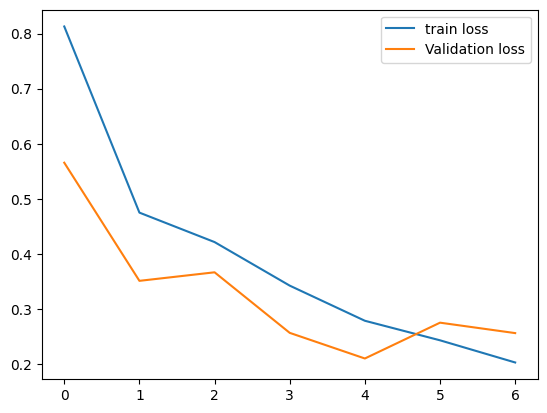

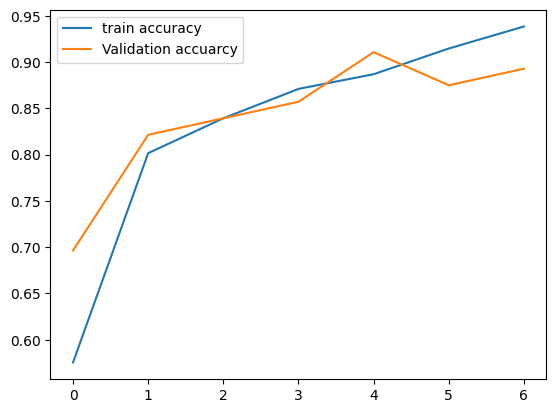

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='Validation accuarcy')
plt.legend()
plt.show()

### Predictive System

Path of the image to be predicted:/content/New Masks Dataset/Validation/Mask/2592.png


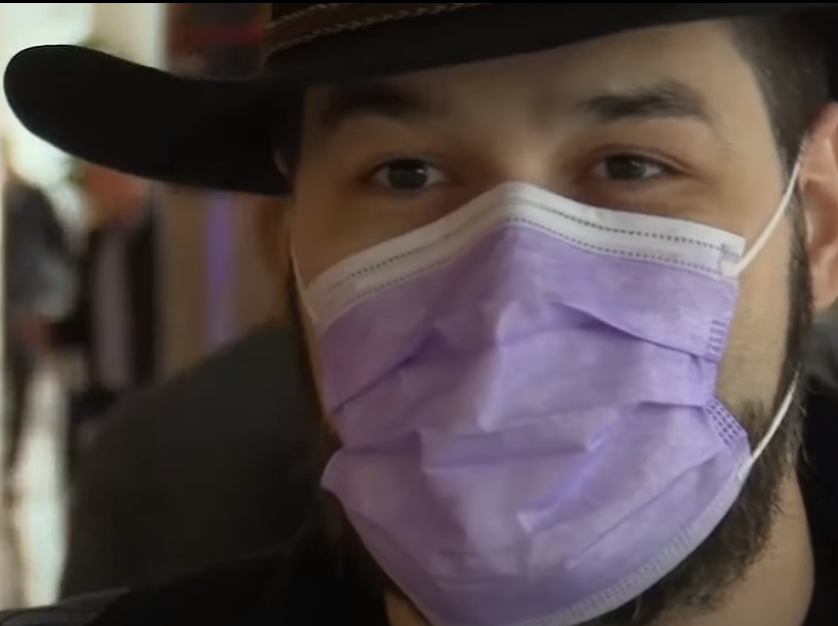

1/1 [==============================] - 0s 31ms/step
[[0.5571308 0.5951266]]
1
The person in the image is wearing a mask


In [42]:
input_image_path = input('Path of the image to be predicted:')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resize/255

input_image_reshape = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshape)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print("The person in the image is wearing a mask")
else:
  print('The person in the image is not wearing a mask')

# <font color='Brown'> CONCLUSION

**In conclusion, the Face Mask Detection System project has successfully developed a reliable and accurate solution using Convolutional Neural Networks (CNNs) to detect whether individuals are wearing masks in public spaces. The model evaluation on the test dataset demonstrated an impressive accuracy of 91.43%, showcasing the system's effectiveness in identifying mask-wearing behavior. This achievement has significant implications for public health, as the automated detection of masks can help prevent the spread of contagious diseases like COVID-19 and ensure safety in public settings. Moving forward, further enhancements and integration with existing surveillance systems can broaden the system's impact and contribute to proactive preventive measures on a larger scale.**